### 📊 Tabela de Atributos da Pesquisa – Redes Sociais e Bem-estar

| **Variável**                       | **Tipo**       | **Descrição**                                                                      |
|-----------------------------------|----------------|------------------------------------------------------------------------------------|
| Idade                             | Inteiro        | Idade em anos                                                                      |
| Gênero                            | Categórico     | Macho ou fêmea                                                                     |
| Nível acadêmico                   | Categórico     | Ensino Médio / Graduação / Pós-Graduação                                           |
| País                              | Categórico     | País de Residência                                                                 |
| Horas_Média_de_Uso_Diário         | Flutuador      | Média de horas por dia nas redes sociais                                           |
| Plataforma_mais_usada            | Categórico     | Instagram, Facebook, TikTok, etc.                                                  |
| Afeta o desempenho acadêmico      | Booleano       | Impacto auto-relatado nos estudos (Sim/Não)                                        |
| Horas_de_sono_por_noite           | Flutuador      | Média de horas de sono noturno                                                     |
| Pontuação de Saúde Mental         | Inteiro        | Autoavaliação da saúde mental (1 = ruim a 10 = excelente)                          |
| Status de relacionamento          | Categórico     | Solteiro / Em um relacionamento / Complicado                                       |
| Conflitos_nas_Mídias_Sociais      | Inteiro        | Número de conflitos de relacionamento devido às mídias sociais                     |
| Pontuação_viciada                 | Inteiro        | Pontuação de vício em mídia social (1 = baixo a 10 = alto)                         |


In [52]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")   

In [2]:
df = pd.read_csv("Students Social Media Addiction.csv")

In [3]:
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [4]:
df.shape

(705, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [6]:
df.isnull().sum()

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

In [7]:
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [8]:
df.drop(columns=["Student_ID"], inplace=True)

# EDA

## Numéricas

In [9]:
numericas = df.select_dtypes(include=["number"]).columns

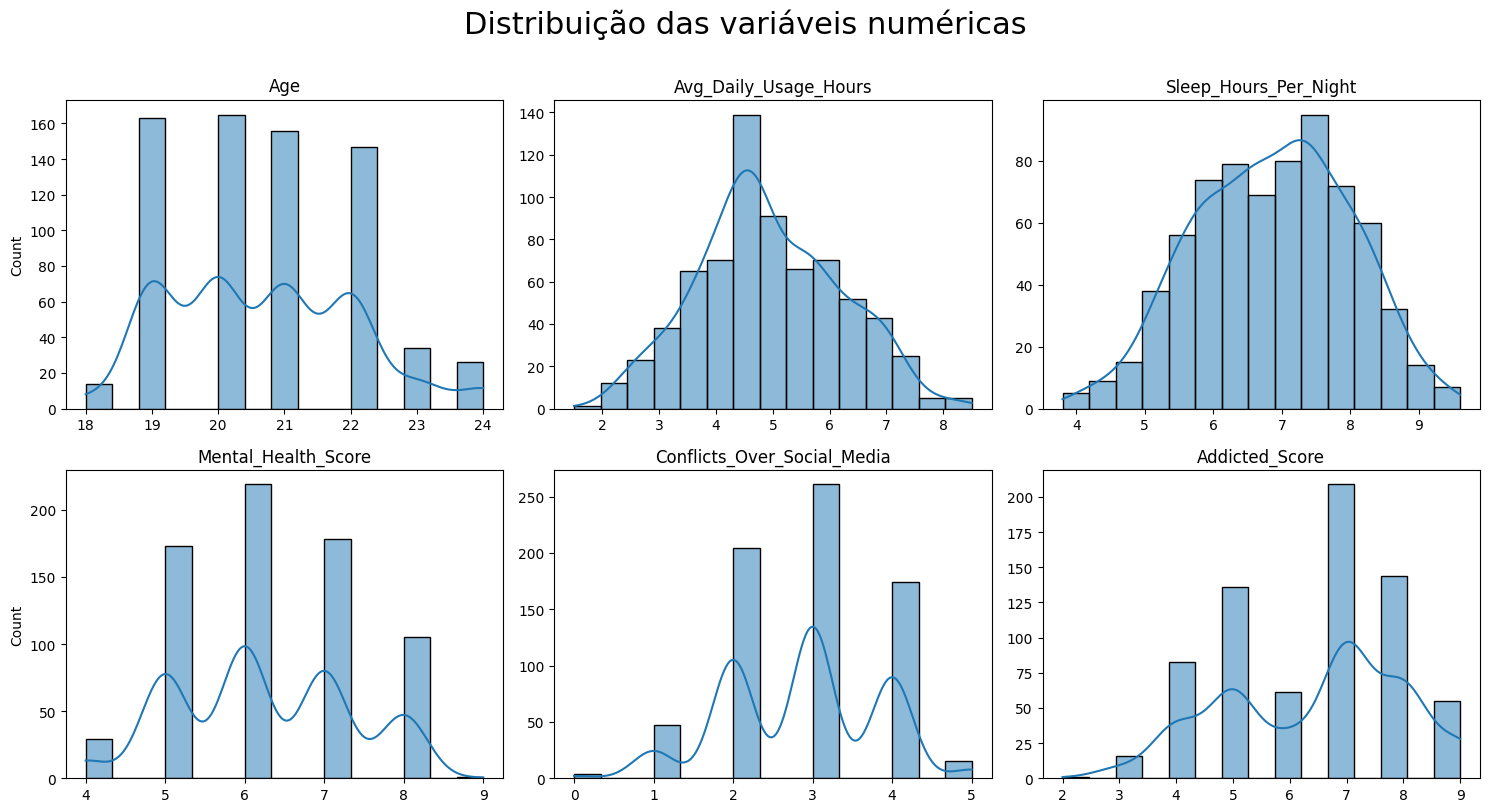

In [10]:
fig, ax = plt.subplots(2,3, figsize=(15,8))
ax = ax.flatten()

for i, col in enumerate(numericas):
    sns.histplot(df[col], ax=ax[i], kde=True, bins=15)
    ax[i].set_title(f"{col}")
    
    ax[i].set_xlabel("")
    if i not in[0, 3]:
        ax[i].set_ylabel("")

plt.suptitle("Distribuição das variáveis numéricas", fontsize=22, y=1.01)
plt.tight_layout()
plt.show()

## Categóricas

In [11]:
categoricas = df.select_dtypes(exclude=["number"]).columns

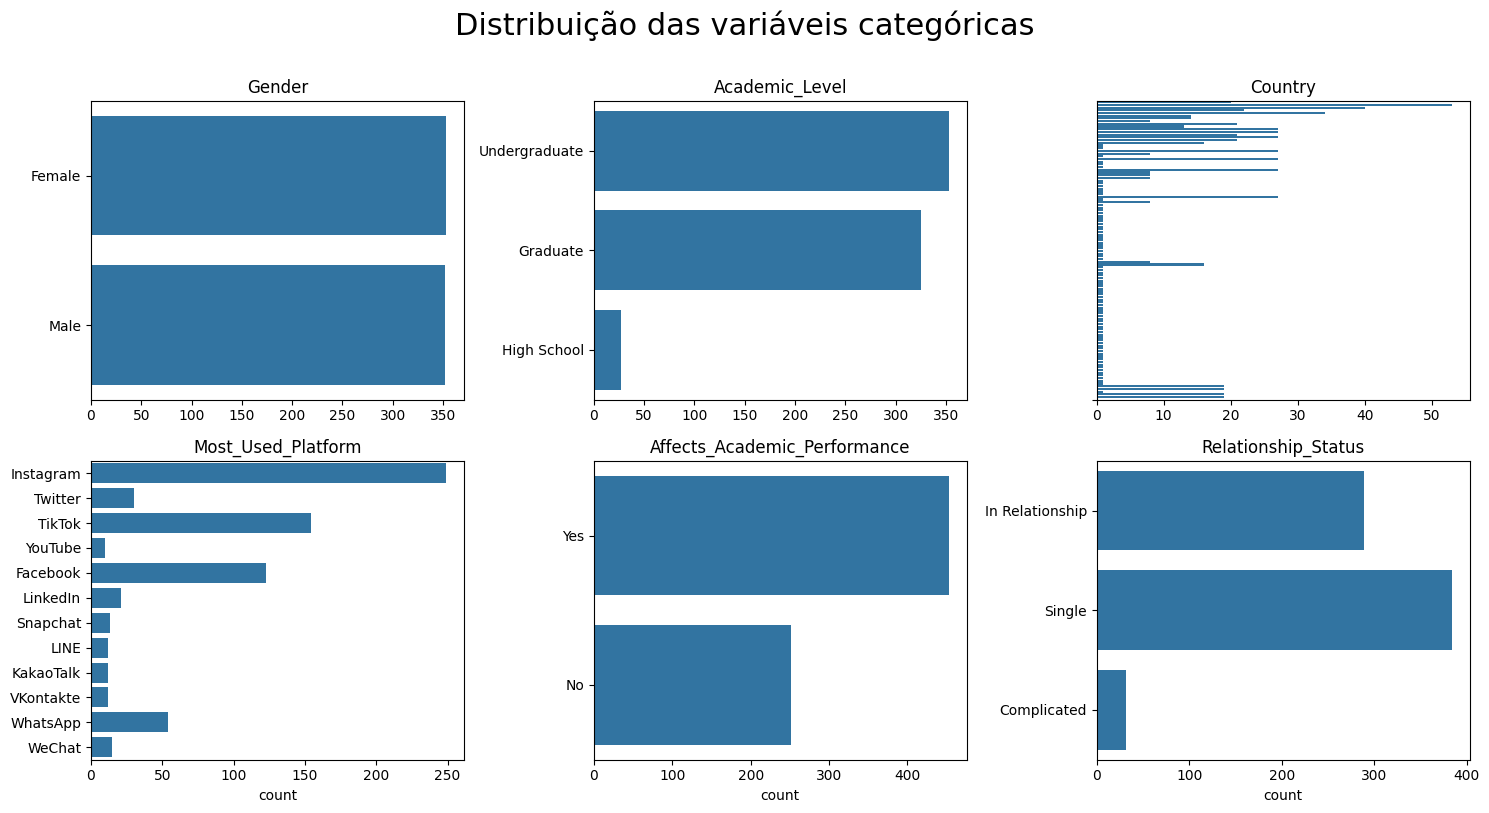

In [12]:
fig, ax = plt.subplots(2,3, figsize=(15,8))
ax = ax.flatten()

for i, col in enumerate(categoricas):
    sns.countplot(df, y=col, ax=ax[i])
    ax[i].set_title(f"{col}")
    
    ax[i].set_ylabel("")
    if col == "Country":
        ax[i].set_yticks("")
        
    if i not in [3, 4, 5]:
        ax[i].set_xlabel("")
        
for i in range(len(categoricas), len(ax)):
    fig.delaxes(ax[i])

plt.suptitle("Distribuição das variáveis categóricas", fontsize=22, y=1.01)
plt.tight_layout()
plt.show()

## Horas de Uso + Genero + Saude Mental

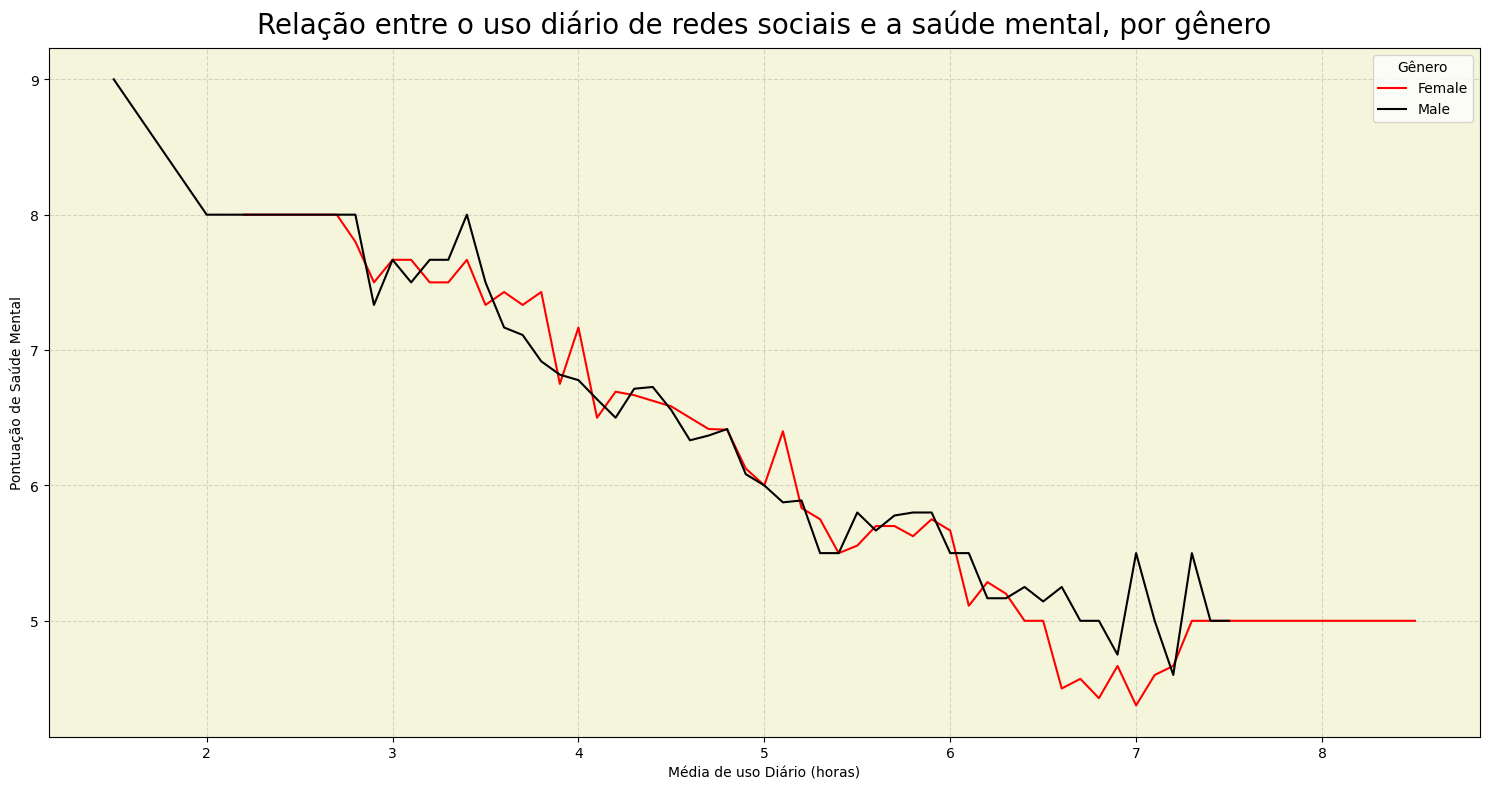

In [13]:
plt.figure(figsize=(15, 8))

custom_palette = {"Male": "black", "Female": "red"}
ax = sns.lineplot(df, x="Avg_Daily_Usage_Hours", y="Mental_Health_Score", hue="Gender", palette=custom_palette, errorbar=None)

plt.title("Relação entre o uso diário de redes sociais e a saúde mental, por gênero", fontsize=20, y=1.01)
plt.xlabel("Média de uso Diário (horas)")
plt.ylabel("Pontuação de Saúde Mental")

plt.grid(linestyle="--", alpha=0.5)
ax.set_facecolor('#f5f5dc')  

plt.legend(title="Gênero", loc="upper right") 
plt.tight_layout()
plt.show()

Observa-se uma correlação negativa entre o uso diário das redes sociais e a saúde mental. Ou seja, quanto maior o tempo de uso diário, menor tende a ser a pontuação de saúde mental dos indivíduos. Esse padrão é evidente tanto em pessoas do sexo masculino quanto feminino, indicando que o impacto negativo do uso excessivo das redes sociais na saúde mental afeta ambos os gêneros de forma semelhante.

## Horas de Uso + Vicio + Horas de Sono

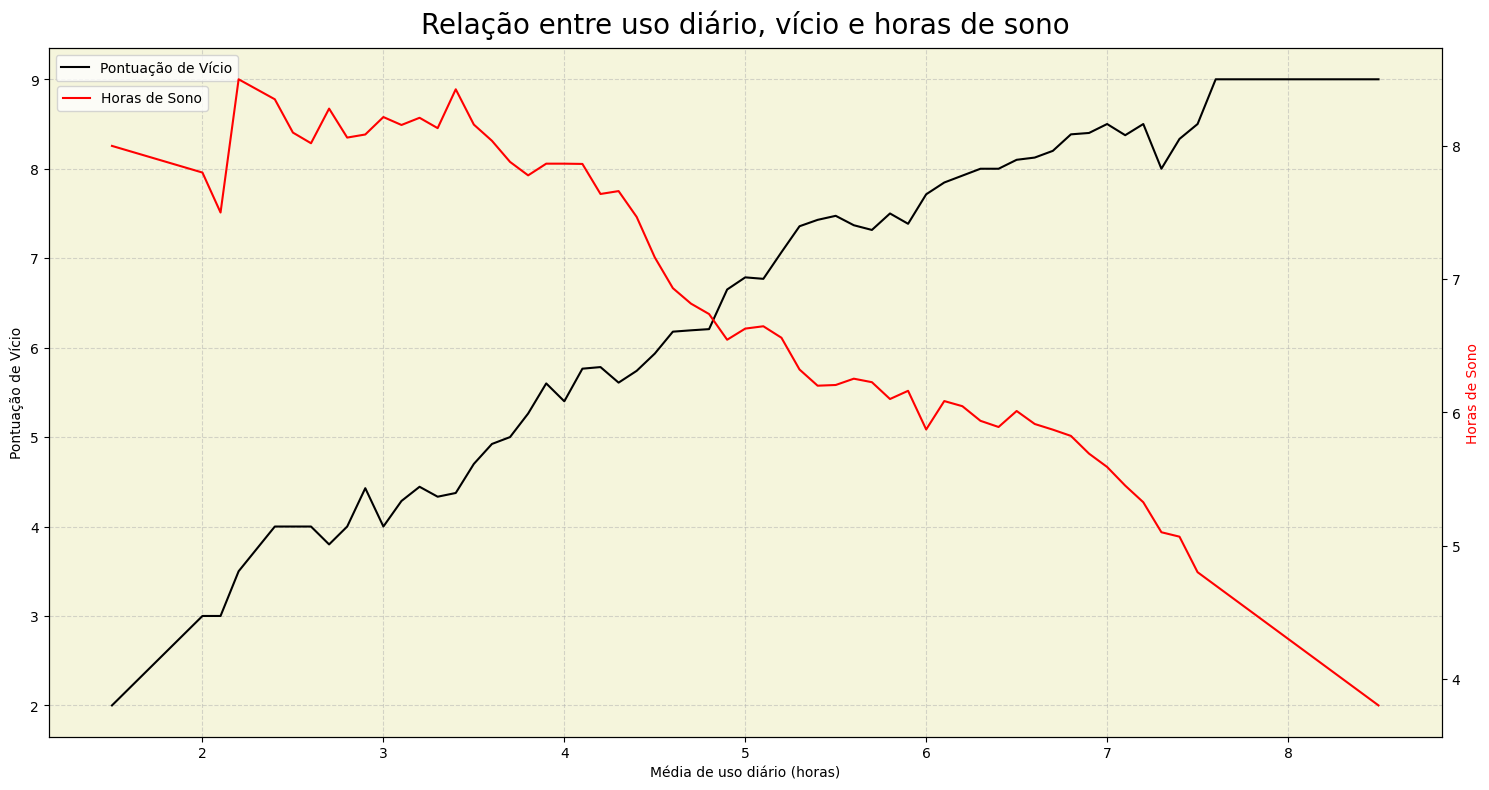

In [14]:
fig, ax1 = plt.subplots(figsize=(15,8))

sns.lineplot(df, x="Avg_Daily_Usage_Hours", y="Addicted_Score", color="black", ax=ax1, errorbar=None, label="Pontuação de Vício")
ax1.set_ylabel("Pontuação de Vício", color="black")

ax2 = ax1.twinx()
sns.lineplot(df, x="Avg_Daily_Usage_Hours", y="Sleep_Hours_Per_Night", color="red", ax=ax2, errorbar=None, label="Horas de Sono")
ax2.set_ylabel("Horas de Sono", color="red")

ax1.set_title("Relação entre uso diário, vício e horas de sono", fontsize=20, y=1.01)
ax1.set_xlabel("Média de uso diário (horas)")
ax1.grid(linestyle="--", alpha=0.5)
ax1.set_facecolor('#f5f5dc')

ax2.legend(loc="upper left", bbox_to_anchor=(0.001, 0.955))
plt.tight_layout()
plt.show()


Como esperado, ao analisar o gráfico, observa-se que quanto maior o tempo de uso diário das redes sociais, maior é a tendência do indivíduo a desenvolver comportamentos de vício e, consequentemente, dormir menos à noite.

## Horas de Uso + Desempenho Acadêmico + Horas de Sono

<Figure size 800x800 with 0 Axes>

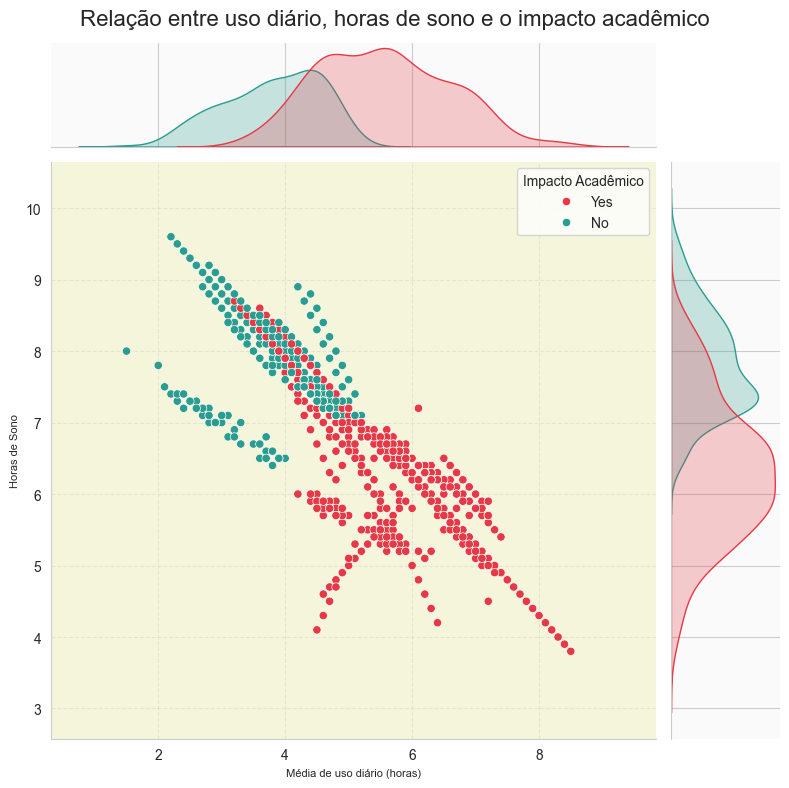

In [53]:
plt.figure(figsize=(8, 8))
sns.set_style("whitegrid")

g = sns.jointplot(data=df, x="Avg_Daily_Usage_Hours", y="Sleep_Hours_Per_Night", hue="Affects_Academic_Performance", kind="scatter", palette={"Yes": "#e63946", "No": "#2a9d8f"}, height=8)

g.fig.suptitle("Relação entre uso diário, horas de sono e o impacto acadêmico", fontsize=16)
g.set_axis_labels("Média de uso diário (horas)", "Horas de Sono", fontsize=8)

g.ax_joint.set_facecolor("#f5f5dc")  
g.ax_joint.grid(True, linestyle="--", alpha=0.4)

g.ax_marg_x.set_facecolor("#fafafa")
g.ax_marg_y.set_facecolor("#fafafa")

plt.legend(title="Impacto Acadêmico", loc="upper right", fontsize=10)
plt.tight_layout()
plt.show()

Com base no gráfico, percebemos que estudantes que utilizam redes sociais por longos períodos e que dormem bastante tendem a ter um desempenho acadêmico mais afetado do que aqueles com hábitos mais equilibrados. Observa-se que indivíduos que dormem mais de 6 horas por noite e utilizam, em média, até 5 horas diárias de redes sociais geralmente não relatam grandes impactos acadêmicos. No entanto, quando o uso ultrapassa esse limite, mesmo mantendo um bom padrão de sono, o risco de prejuízo no desempenho aumenta. Embora existam exceções esses casos são minoria.

## Redes Sociais + Vícios

In [54]:
media_redes = df.groupby("Most_Used_Platform")["Addicted_Score"].mean().reset_index().sort_values(by="Addicted_Score",ascending=False)

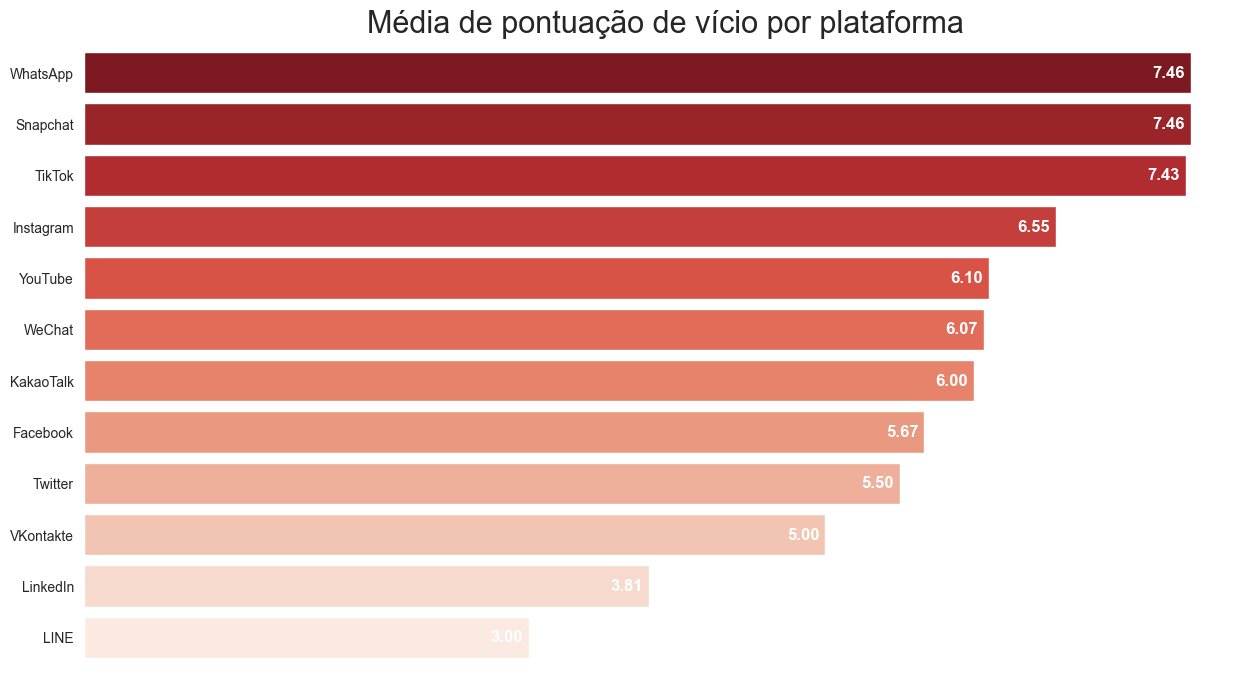

In [87]:
plt.figure(figsize=(15,8))
ax = sns.barplot(media_redes, y="Most_Used_Platform", x="Addicted_Score", errorbar=None, palette="Reds_r")
plt.title("Média de pontuação de vício por plataforma", fontsize=22, y=1.01)
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_xticks([])
ax.set_frame_on(False)
ax.grid(axis="x", linestyle="--")

for container in ax.containers:
    labels = [f"{valor.get_width():.2f}" for valor in container]
    widths = [valor.get_width() - 0.15  for valor in container]
    
    for bar, label, width in zip(container, labels, widths):
        ax.text(width, bar.get_y() + bar.get_height()/2, label, ha="center", va='center', color="white", fontweight="bold", fontsize=12)
plt.show()

Percebemos que as plataformas com maiores níveis médios de vício são o WhatsApp, Snapchat e TikTok, todas apresentando pontuações acima de 7 na escala de vício. Esses dados indicam que essas redes, geralmente mais dinâmicas e com forte apelo social e de entretenimento, estão mais associadas a comportamentos de uso excessivo. Por outro lado, plataformas como LinkedIn e LINE registraram as menores pontuações médias, todas abaixo de 4, sugerindo um uso mais moderado e funcional, possivelmente ligado a contextos profissionais ou menos imersivos.